#Import titanic competitions

In [1]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
ls

 Volume in drive E is New Volume
 Volume Serial Number is 7879-FFB6

 Directory of e:\ICBT\BSc ICBT\2nd sem CI\Titanic

08/31/2023  11:01 PM                 0 ,
09/01/2023  05:40 PM    <DIR>          .
09/01/2023  03:27 PM    <DIR>          ..
08/31/2023  09:09 PM    <DIR>          .vscode
09/01/2023  05:18 PM         7,818,382 model.pkl
09/01/2023  05:38 PM             3,258 predictions1.csv
09/01/2023  12:46 AM    <DIR>          titanic
09/01/2023  05:44 PM            12,520 titanic.ipynb
08/31/2023  09:07 PM            34,877 titanic.zip
               5 File(s)      7,869,037 bytes
               4 Dir(s)  244,955,648,000 bytes free


#Install Lib

In [3]:
%pip install pandas
%pip install matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#Import Lib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Read .csv using pandas

In [5]:
titanic_data = pd.read_csv('titanic/train.csv')
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]) :
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

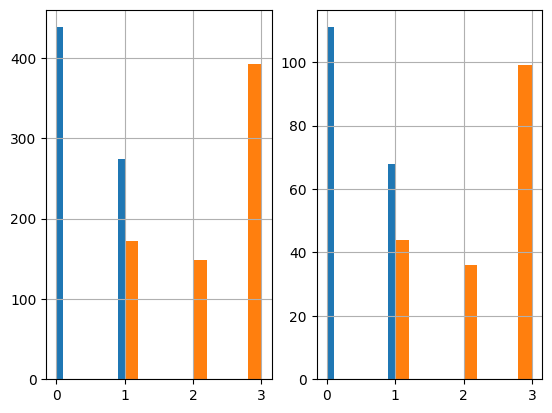

In [8]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [9]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 376 to 384
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          569 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None) :
        return self
    
    def transform(self, X) :
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [11]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin) :
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names = ["C","S","Q","N"]


        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()

        column_names = ["Female", "Male"]

        for i in range(len(matrix.T)) :
            print(i)
            X[column_names[i]] = matrix.T[i]
            
        return X

In [12]:
class FeatureDropper(BaseEstimator, TransformerMixin) :
    def fit(self, X, y=None):
        return self

    def transform(self, X) :
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [13]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("ageimputer", AgeImputer()), 
    ("featureencoder", FeatureEncoder()), 
    ("featuredropper", FeatureDropper() )
])

In [14]:
strat_train_set = pipeline.fit_transform(strat_train_set)

0
1


In [15]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 376 to 384
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [16]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
x_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [17]:
x_data

array([[-0.28086186,  0.82789342, -0.6073575 , ...,  0.63152294,
         1.35941164, -1.35941164],
       [-1.57346423,  0.82789342, -1.24118191, ..., -1.58347376,
         1.35941164, -1.35941164],
       [ 0.79311044,  0.82789342,  0.        , ...,  0.63152294,
        -0.73561236,  0.73561236],
       ...,
       [ 0.78927482, -0.37019624, -0.4489014 , ...,  0.63152294,
        -0.73561236,  0.73561236],
       [ 0.54379544, -1.56828591,  1.76948402, ..., -1.58347376,
         1.35941164, -1.35941164],
       [-0.25017693,  0.82789342,  0.        , ...,  0.63152294,
        -0.73561236,  0.73561236]])

#Apply RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth":[None, 5, 10], "min_samples_split":[2,3,4]}
]

grid_serach = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_serach.fit(x_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [19]:
final_clf = grid_serach.best_estimator_
final_clf

RandomForestClassifier(min_samples_split=4)

In [20]:
strat_test_set = pipeline.fit_transform(strat_test_set)


0
1


In [21]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [22]:
final_clf.score(X_data_test, y_data_test)

0.8100558659217877

In [23]:
final_data = pipeline.fit_transform(titanic_data)

0
1


In [24]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [25]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
x_data_final = scaler.fit_transform(X_final)
y_data_final = y.to_numpy()

In [26]:
print(y_data_final)

[1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0
 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0
 1 0 0 1 1 0 0 0 1 1 1 0 

In [27]:
final_clf = grid_serach.best_estimator_
final_clf

RandomForestClassifier(min_samples_split=4)

In [28]:
titanic_test_data = pd.read_csv("titanic/test.csv")

In [29]:
final_test_data = pipeline.fit_transform(titanic_test_data)

0
1


In [30]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [31]:
from sklearn.preprocessing import StandardScaler

X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [32]:
predistions = final_clf.predict(X_data_final_test)

In [33]:
predistions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [34]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predistions
final_df.to_csv("predictions1.csv", index=False)

#Import pickle for export Model 

In [35]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(final_clf, file)

#Test Load For Work it

In [36]:
loaded_model = pickle.load(open(r"model.pkl", "rb"))

In [37]:
loaded_model

RandomForestClassifier(min_samples_split=4)